SelectFilesButton(description='Select File', icon='square-o', style=ButtonStyle(button_color='orange'))

/home/user/Desktop/nettransform/dog.jpg


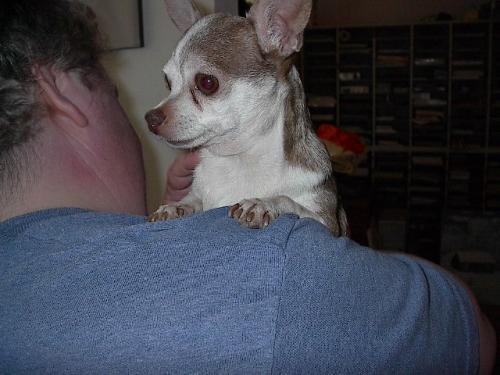

<PIL.Image.Image image mode=RGB size=500x376 at 0x7F68F495FEF0>


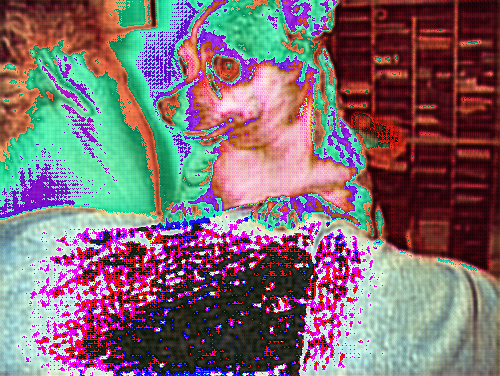

In [12]:
# Documentation
# The script has a purpose to take an image file and process the image file
# though the trained Autoencoder. The neural net autoencoder is a trained
# generator from a GAN. 
# input: an image file 
# output: None
# result: gives an image of the original and transformed files
#
# dependencies
# pytorch 0.4.0, ipywidgets,jupyter notebook, PIL ,anaconda 
#

#file input imports
import traitlets
from ipywidgets import widgets
from IPython.display import display
from tkinter import Tk
from tkinter import filedialog
# PIL
from PIL import Image


# GAN autoencoder imports
import torch
import torchvision
import argparse
import os
import numpy as np
import math
import itertools
import datetime
import time

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

from GAN import *
from data import *
from utils import *

from PIL import Image

class SelectFilesButton(widgets.Button):
    """A file widget that leverages tkinter.filedialog."""

    def __init__(self):
        super(SelectFilesButton, self).__init__()
        # Add the selected_files trait
        self.add_traits(files=traitlets.traitlets.Unicode())
        # Create the button.
        self.description = "Select File"
        self.icon = "square-o"
        self.style.button_color = "orange"
        # Set on click behavior.
        self.on_click(self.select_files)
    def getfile(self):
        return self.files
    @staticmethod
    def select_files(b):
        """Generate instance of tkinter.filedialog.

        Parameters
        ----------
        b : obj:
            An instance of ipywidgets.widgets.Button 
        """
        # Create Tk root
        root = Tk()
        # Hide the main window
        root.withdraw()
        # Raise the root to the top of all windows.
        root.call('wm', 'attributes', '.', '-topmost', True)
        # List of selected fileswill be set to b.value
        b.files = filedialog.askopenfilename(multiple=False)
        
        if(b.files!=""):
            b.description = "File Selected"
            b.icon = "check-square-o"
            b.style.button_color = "lightgreen"


# Initialize generator and discriminator
#AutoEncoder = GeneratorResNet(res_blocks=opt.n_residual_blocks)

def sample_image(image,AutoEncoder,reverse):
    """Saves a generated sample from the test set"""
    result=AutoEncoder(image)[0]
    #print(result)
    result=reverse(result)
    print(result)
    display(result)
    #save_image(result, 'returnimage.png', nrow=5, normalize=True)

def transformimage(image):
	afile='AutoEncoder.pth'
	imagefile=image
	im=Image.open(imagefile)
	width, height = im.size
	reverse=transforms.ToPILImage();
	transform_ = [ transforms.Resize(int(height*1.12), Image.BICUBIC),transforms.RandomCrop((height, width)),transforms.RandomHorizontalFlip(),transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)) ]
	transform = transforms.Compose(transform_)
	im = transform(im).unsqueeze(0)
	if(os.path.exists(afile)):
		AutoEncoder= GeneratorResNet()
		AutoEncoder.load_state_dict(torch.load(afile))
		#AutoEncoder.load_state_dict(afile)
	
	cuda = True if torch.cuda.is_available() else False
	if cuda:
	    AutoEncoder = AutoEncoder.cuda()
	    #criterion_GAN.cuda()
	    #criterion_cycle.cuda()
	    #criterion_identity.cuda()
	#print(im)   
	sample_image(im,AutoEncoder,reverse)
	#print(im)


image=""
def on_change(change):
    print(change['new'])
    imagepath= change['new']
    #path='/home/user/Desktop/nettransform/default.jpg'
    #print(image)
    if(imagepath != ""):
        display(Image.open(imagepath))
        transformimage(imagepath)

button = SelectFilesButton()
button.files = image
button.observe(on_change, names='files')
box=widgets.Box([widgets.Label(image)])
display(button)
#path='/home/user/Desktop/nettransform/default.jpg'
#    if(image != ""):
#        path=image
        #transformimage(image)
#    display(Image.open(path))
